# Trabalho 02
Giliardi Schmidt - 161150704<br>
Guilherme Bolfe - 161150899

## Referências

http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/indexf23d.html?id=199

https://www.youtube.com/watch?v=LDRbO9a6XPU

https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset/notebook

## Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

## Leitura dos Dados

### Dados de Treinamento

In [2]:
treinamento = pd.read_csv('data/train.csv')

### Dados de Teste

In [3]:
teste = pd.read_csv('data/test.csv')

## Visualização dos Dados

### Dados de Treinamento

In [4]:
treinamento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dados de Teste

In [5]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Analisando os Dados

### Verificando Valores Nulos

#### Valores Nulos do Arquivo de Teste

In [6]:
for col in teste:
    if teste[col].isnull().sum()>0:
        print("Valores Faltantes em %s %d" % (col,(teste[col].isnull().sum())))

Valores Faltantes em Age 86
Valores Faltantes em Fare 1
Valores Faltantes em Cabin 327


#### Valores Nulos do Arquivo de Treinamento

In [7]:
for col in treinamento:
    if treinamento[col].isnull().sum()>0:
        print("Valores Faltantes em %s %d" % (col,(treinamento[col].isnull().sum())))

Valores Faltantes em Age 177
Valores Faltantes em Cabin 687
Valores Faltantes em Embarked 2


### Substituindo Valores Nulos

#### Arquivo de Teste

##### Coluna Age

In [8]:
teste['Title'] = [nameStr[1].strip().split('.')[0] for nameStr in
teste['Name'].str.split(',')]

In [9]:
aggAgeByTitleT = teste[['Age','Title']].groupby(['Title']).mean().reset_index()

In [10]:
aggAgeByTitleT.columns = ['Title','Mean_Age']

In [11]:
teste_novo = pd.merge(teste, aggAgeByTitleT,on="Title")

In [12]:
teste_novo.loc[teste_novo['Age'].isnull(),'Age']=teste_novo[teste_novo['Age'].isnull()]['Mean_Age']

In [13]:
teste_novo.loc[411,"Age"] = 37

##### Coluna Fare

In [14]:
teste_novo.loc[teste_novo['Fare'].isnull(),'Fare'] = teste_novo[teste_novo['Pclass'] == 3]['Fare'].mean()

##### Coluna Cabin

In [15]:
teste_novo['IsCabinDataEmpty'] = 0
teste_novo.loc[teste_novo['Cabin'].isnull(),'IsCabinDataEmpty'] = 1

##### Tamanho da Família

In [16]:
 teste_novo['FamilySize'] = teste_novo['SibSp'] + teste_novo['Parch'] + 1

#### Arquivo de Treinamento

##### Coluna Age

In [17]:
treinamento['Title'] = [nameStr[1].strip().split('.')[0] for nameStr in
treinamento['Name'].str.split(',')]

In [18]:
aggAgeByTitleDS = treinamento[['Age','Title']].groupby(['Title']).mean().reset_index()

In [19]:
aggAgeByTitleDS.columns = ['Title','Mean_Age']

In [20]:
treinamento_novo = pd.merge(treinamento, aggAgeByTitleDS,on="Title")

In [21]:
treinamento_novo.loc[treinamento_novo['Age'].isnull(),'Age']=treinamento_novo[treinamento_novo['Age'].isnull()]['Mean_Age']

##### Coluna Cabin

In [22]:
treinamento_novo['IsCabinDataEmpty'] = 0
treinamento_novo.loc[treinamento_novo['Cabin'].isnull(),'IsCabinDataEmpty'] = 1

##### Coluna Embarked

In [23]:
treinamento_novo['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
treinamento_novo.loc[treinamento_novo['Embarked'].isnull(),'Embarked'] = 'S'

##### Tamanho da Família

In [25]:
treinamento_novo['FamilySize'] = treinamento_novo['SibSp'] + treinamento_novo['Parch'] + 1

## Transformação dos Dados

### Arquivo de Treinamento

#### Remoção das Colunas Não Utilizadas

In [26]:
treinamento_novo = treinamento_novo.drop('Mean_Age',axis=1)
treinamento_novo = treinamento_novo.drop('Cabin',axis=1)
treinamento_novo = treinamento_novo.drop('Fare',axis=1)
treinamento_novo = treinamento_novo.drop('Ticket',axis=1)
treinamento_novo = treinamento_novo.drop('SibSp',axis=1)
treinamento_novo = treinamento_novo.drop('Parch',axis=1)
treinamento_novo = treinamento_novo.drop('Name',axis=1)
treinamento_novo = treinamento_novo.drop('PassengerId',axis=1)

In [27]:
treinamento_novo.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsCabinDataEmpty,FamilySize
0,0,3,male,22.00000,S,Mr,1,2
1,0,3,male,35.00000,S,Mr,1,1
2,0,3,male,32.36809,Q,Mr,1,1
3,0,1,male,54.00000,S,Mr,0,1
4,0,3,male,20.00000,S,Mr,1,1


#### Substituição de Valores nas Colunas

In [28]:
treinamento_novo = treinamento_novo.replace({"Sex": {"male":0}})
treinamento_novo = treinamento_novo.replace({"Sex": {"female":1}})

In [29]:
treinamento_novo = treinamento_novo.replace({"Embarked": {"S":0}})
treinamento_novo = treinamento_novo.replace({"Embarked": {"Q":1}})
treinamento_novo = treinamento_novo.replace({"Embarked": {"C":2}})

In [30]:
treinamento_novo.loc[ treinamento_novo['Age'] <= 16, 'Age']= 0 
treinamento_novo.loc[(treinamento_novo['Age'] > 16) & (treinamento_novo['Age'] <= 32), 'Age'] = 1 
treinamento_novo.loc[(treinamento_novo['Age'] > 32) & (treinamento_novo['Age'] <= 48), 'Age'] = 2 
treinamento_novo.loc[(treinamento_novo['Age'] > 48) & (treinamento_novo['Age'] <= 64), 'Age'] = 3 
treinamento_novo.loc[ treinamento_novo['Age'] > 64, 'Age'] = 4

In [31]:
treinamento_novo.loc[ treinamento_novo['FamilySize'] <= 2, 'FamilySize']= 0 
treinamento_novo.loc[(treinamento_novo['FamilySize'] > 2) & (treinamento_novo['FamilySize'] <=4), 'FamilySize'] = 1 
treinamento_novo.loc[(treinamento_novo['FamilySize'] > 4) & (treinamento_novo['FamilySize'] <=8), 'FamilySize'] = 2
treinamento_novo.loc[ treinamento_novo['FamilySize'] > 8, 'FamilySize'] = 4

In [32]:
treinamento_novo['Title'] = treinamento_novo['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
treinamento_novo['Title'] = treinamento_novo['Title'].replace('Mlle', 'Miss')
treinamento_novo['Title'] = treinamento_novo['Title'].replace('Ms', 'Miss')
treinamento_novo['Title'] = treinamento_novo['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
treinamento_novo['Title'] = treinamento_novo['Title'].map(title_mapping)
treinamento_novo['Title'] = treinamento_novo['Title'].fillna(0)

In [33]:
treinamento_novo.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsCabinDataEmpty,FamilySize
0,0,3,0,1.0,0,1.0,1,0
1,0,3,0,2.0,0,1.0,1,0
2,0,3,0,2.0,1,1.0,1,0
3,0,1,0,3.0,0,1.0,0,0
4,0,3,0,1.0,0,1.0,1,0


### Arquivo de Teste

#### Remoção de Colunas Não Utilizadas

In [34]:
teste_novo = teste_novo.drop('Mean_Age',axis=1)
teste_novo = teste_novo.drop('Cabin',axis=1)
teste_novo = teste_novo.drop('Fare',axis=1)
teste_novo = teste_novo.drop('Ticket',axis=1)
teste_novo = teste_novo.drop('SibSp',axis=1)
teste_novo = teste_novo.drop('Parch',axis=1)
teste_novo = teste_novo.drop('Name',axis=1)
teste_novo = teste_novo.drop('PassengerId',axis=1)

In [35]:
teste_novo.head()

,Pclass,Sex,Age,Embarked,Title,IsCabinDataEmpty,FamilySize
0,3,male,34.5,Q,Mr,1,1
1,2,male,62.0,Q,Mr,1,1
2,3,male,27.0,S,Mr,1,1
3,3,male,14.0,S,Mr,1,1
4,2,male,26.0,S,Mr,1,3


#### Substituição de Valores nas Colunas

In [36]:
teste_novo = teste_novo.replace({"Sex": {"male":0}})
teste_novo = teste_novo.replace({"Sex": {"female":1}})

In [37]:
teste_novo = teste_novo.replace({"Embarked": {"S":0}})
teste_novo = teste_novo.replace({"Embarked": {"Q":1}})
teste_novo = teste_novo.replace({"Embarked": {"C":2}})

In [38]:
teste_novo.loc[ teste_novo['FamilySize'] <= 2, 'FamilySize']= 0 
teste_novo.loc[(teste_novo['FamilySize'] > 2) & (teste_novo['FamilySize'] <=4), 'FamilySize'] = 1 
teste_novo.loc[(teste_novo['FamilySize'] > 4) & (teste_novo['FamilySize'] <=8), 'FamilySize'] = 2
teste_novo.loc[ teste_novo['FamilySize'] > 8, 'FamilySize'] = 4

In [39]:
teste_novo.loc[ teste_novo['Age'] <= 16, 'Age']= 0 
teste_novo.loc[(teste_novo['Age'] > 16) & (teste_novo['Age'] <= 32), 'Age'] = 1 
teste_novo.loc[(teste_novo['Age'] > 32) & (teste_novo['Age'] <= 48), 'Age'] = 2 
teste_novo.loc[(teste_novo['Age'] > 48) & (teste_novo['Age'] <= 64), 'Age'] = 3 
teste_novo.loc[ teste_novo['Age'] > 64, 'Age'] = 4

In [40]:
teste_novo['Title'] = teste_novo['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
teste_novo['Title'] = teste_novo['Title'].replace('Mlle', 'Miss')
teste_novo['Title'] = teste_novo['Title'].replace('Ms', 'Miss')
teste_novo['Title'] = teste_novo['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
teste_novo['Title'] = teste_novo['Title'].map(title_mapping)
teste_novo['Title'] = teste_novo['Title'].fillna(0)

In [41]:
teste_novo.head()

,Pclass,Sex,Age,Embarked,Title,IsCabinDataEmpty,FamilySize
0,3,0,2.0,1,1,1,0
1,2,0,3.0,1,1,1,0
2,3,0,1.0,0,1,1,0
3,3,0,0.0,0,1,1,0
4,2,0,1.0,0,1,1,1


### Verificando Classes nas Colunas

#### Arquivo de Treinamento

In [42]:
treinamento_novo['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [43]:
treinamento_novo['Title'].value_counts()

1.0    517
4.0    185
3.0    126
2.0     40
5.0     22
0.0      1
Name: Title, dtype: int64

In [44]:
treinamento_novo['Age'].value_counts()

1.0    382
2.0    325
0.0    104
3.0     69
4.0     11
Name: Age, dtype: int64

In [45]:
treinamento_novo['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [46]:
treinamento_novo['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [47]:
treinamento_novo['Embarked'].value_counts()

0    646
2    168
1     77
Name: Embarked, dtype: int64

In [48]:
treinamento_novo['IsCabinDataEmpty'].value_counts()

1    687
0    204
Name: IsCabinDataEmpty, dtype: int64

In [49]:
treinamento_novo['FamilySize'].value_counts()

0    698
1    131
2     55
4      7
Name: FamilySize, dtype: int64

#### Arquivo de Teste

In [50]:
teste_novo['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [51]:
teste_novo['Title'].value_counts()

1    240
4     79
3     72
2     21
5      6
Name: Title, dtype: int64

In [52]:
teste_novo['Age'].value_counts()

1.0    249
2.0     92
0.0     38
3.0     37
4.0      2
Name: Age, dtype: int64

In [53]:
teste_novo['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [54]:
teste_novo['Embarked'].value_counts()

0    270
2    102
1     46
Name: Embarked, dtype: int64

In [55]:
teste_novo['IsCabinDataEmpty'].value_counts()

1    327
0     91
Name: IsCabinDataEmpty, dtype: int64

## Construção da árvore

In [56]:
#encontrar as classes presentes em uma coluna

def col_classes(rows, col):
    res = treinamento_novo[col].unique()
    return res

In [57]:
#contar nº de elementos para cada classe classe

def classes_counts(rows):
    survived = rows[rows["Survived"] == 1]
    died = rows[rows["Survived"] == 0]
    
    return {"Survived":survived.shape[0], "Dead":died.shape[0]}

In [58]:
#particionar os dados em baseados em uma classe
#rows = dados
#column = coluna a ser utilizada para particionar
#conditions = condições a serem utilizadas

def partition(rows, column, conditions):
    ret = [None] * len(conditions)
    
    for i in range(len(ret)):
        ret[i] =  rows[rows[column] == conditions[i]]
            
    return ret

In [59]:
#calc entropia
def entropy(rows):
    survived = rows[rows["Survived"] == 1]
    died = rows[rows["Survived"] == 0]
  
    survived_count = survived.shape[0] 
    died_count = died.shape[0]
    
    #se só tem uma classe a entropia é 0
    if(survived_count == 0 or died_count == 0):
        return 0
    
    survived_p = survived_count / (survived_count + died_count)
    died_p = 1.0 - survived_p 
    
    #se só tem uma classe a entropia é 0
    if(died_p == 0 or survived_p == 0):
        return 0
    
    ret = -survived_p * math.log(survived_p, 2) - died_p * math.log(died_p, 2)
    
    return ret
    

In [60]:
#calc ganho
def gain(rows, column):
    #entropia do nodo pai
    e = entropy(rows)
    
    #classes
    conditions = col_classes(rows, column)
    #filhos separados por classe
    children = partition(rows,column,conditions)
    
    #remove a classe "Survived"
    children.pop()
    
    w = 0
    for c in children:
        ec = entropy(c)
        if ec > 0:
            w += c.shape[0] / rows.shape[0] * ec
        
    return e-w
    

In [61]:
#acha o atributo separados com maior ganho
def find_best_gain(rows):
    #[ganho, 'coluna']
    max_gain = [0.0,'']
    
    columns = rows.columns.tolist()
    #remove a classe "Survived"
    del columns[0]
    
    #encontra o com maior ganho
    for i in range(len(columns)):
        g = gain(rows, columns[i])
        
        if(g >= max_gain[0]):
            max_gain[0] = g
            max_gain[1] = columns[i]
        
        
    return max_gain

In [62]:
class Leaf:

    def __init__(self, rows):
        self.predictions = classes_counts(rows)
        
    def print(self, space, attr = ""):
        print(space,'Leaf',self.predictions,attr)

In [63]:
class Decision_Node:

    #column = 'nome da coluna'
    #branches = dict de filhos, onde a chave é a classe e o valor é o nodo: {1:Decision_Node_Object}
    def __init__(self, column, branches):
        self.column = column
        self.branches = branches
        
    def print(self,space="", attr = ""):
        print(space,"Node -> ",self.column, attr)
        for k,v in self.branches.items():
            v.print(space+" ",str(k))

In [64]:
#constroi a arvore
def tree(rows):
    #acha o melhor separador
    best = find_best_gain(rows)
    
    #criterio de parada para essa branch
    if best[0] == 0 or entropy(rows) == 0:
        return Leaf(rows)
        
    conditions = col_classes(rows, best[1])
    children = partition(rows, best[1], conditions)
    branches = {}
    
    for i in range(len(children)):
        #remove a coluna usada para separar
        aux = children[i].drop(best[1],axis=1)
        branches[conditions[i]] = tree(aux)
        
    return Decision_Node(best[1], branches)
    
    

In [65]:
arvore = tree(treinamento_novo)

In [66]:
#classifica
def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions
    
    value = row[node.column]
    branch = node.branches[value]
         
    return classify(row, branch)

In [67]:
def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    try:
        for lbl in counts.keys():
            probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    except:
        print(counts)
        return
    return probs

### Teste

In [68]:
def teste(rows):
    total_errors = 0

    for index, row in rows.iterrows():
        res = classify(row, arvore)
        error = ''

        if res['Survived'] >= res['Dead']:
            expexted = "Survived"
            if row['Survived'] == 0:
                total_errors+=1
                error = 'Error'
                expexted = "Dead"
        else:
            expected = 'Dead'
            if row['Survived'] == 1:
                total_errors+=1
                error = 'Error'
                expected = 'Survived'

        print('Expected:',expected,print_leaf(res),error)

    error_percent = str((total_errors / rows.shape[0])*100)+"%"
    print('')
    print('Total de erros:',total_errors,'Total de amostras:',rows.shape[0])
    print('Erro:',error_percent)
    
    return float(error_percent.replace("%",""))

def compare(rows):
    total_errors = 0

    for index, row in rows.iterrows():
        res = classify(row, arvore)
        error = ''

        if res['Survived'] >= res['Dead']:
            expexted = "Survived"
            if row['Survived'] == 0:
                total_errors+=1
                error = 'Error'
                expexted = "Dead"
        else:
            expected = 'Dead'
            if row['Survived'] == 1:
                total_errors+=1
                error = 'Error'
                expected = 'Survived'

    error_percent = str((total_errors / rows.shape[0])*100)+"%"
    print('Total de erros:',total_errors,'Total de amostras:',rows.shape[0])
    print('Erro:',error_percent)
    
    return float(error_percent.replace("%","")),total_errors

In [69]:
teste(treinamento_novo)

Expected: Dead {'Survived': '14%', 'Dead': '85%'} 
Expected: Dead {'Survived': '8%', 'Dead': '91%'} 
Expected: Dead {'Survived': '4%', 'Dead': '95%'} 
Expected: Dead {'Survived': '12%', 'Dead': '87%'} 
Expected: Dead {'Survived': '14%', 'Dead': '85%'} 
Expected: Dead {'Survived': '0%', 'Dead': '100%'} 
Expected: Survived {'Survived': '7%', 'Dead': '92%'} Error
Expected: Dead {'Survived': '7%', 'Dead': '92%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Survived {'Survived': '40%', 'Dead': '60%'} Error
Expected: Dead {'Survived': '4%', 'Dead': '95%'} 
Expected: Dead {'Survived': '0%', 'Dead': '100%'} 
Expected: Dead {'Survived': '8%', 'Dead': '91%'} 
Expected: Dead {'Survived': '0%', 'Dead': '100%'} 
Expected: Dead {'Survived': '0%', 'Dead': '100%'} 
Expected: Dead {'Survived': '37%', 'Dead': '62%'} 
Expected: Survived {'Survived': '4%', 'Dead': '95%'} Error
Expected: Dead {'Survived': '14%', 'Dead': '85%'} 
Expected: Dead {'Survived': '4%', 'Dead': '95%'} 
Expected: De

Expected: Dead {'Survived': '4%', 'Dead': '95%'} 
Expected: Survived {'Survived': '14%', 'Dead': '85%'} Error
Expected: Survived {'Survived': '16%', 'Dead': '83%'} Error
Expected: Survived {'Survived': '34%', 'Dead': '65%'} Error
Expected: Dead {'Survived': '20%', 'Dead': '80%'} 
Expected: Dead {'Survived': '14%', 'Dead': '85%'} 
Expected: Survived {'Survived': '14%', 'Dead': '85%'} Error
Expected: Dead {'Survived': '16%', 'Dead': '83%'} 
Expected: Dead {'Survived': '62%', 'Dead': '37%'} Error
Expected: Dead {'Survived': '4%', 'Dead': '95%'} 
Expected: Dead {'Survived': '7%', 'Dead': '92%'} 
Expected: Survived {'Survived': '33%', 'Dead': '66%'} Error
Expected: Dead {'Survived': '14%', 'Dead': '85%'} 
Expected: Dead {'Survived': '8%', 'Dead': '91%'} 
Expected: Dead {'Survived': '8%', 'Dead': '91%'} 
Expected: Dead {'Survived': '8%', 'Dead': '91%'} 
Expected: Dead {'Survived': '7%', 'Dead': '92%'} 
Expected: Dead {'Survived': '0%', 'Dead': '100%'} 
Expected: Dead {'Survived': '0%', 'Dead

Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '0%', 'Dead': '100%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '50%', 'Dead': '50%'} 
Expected: Dead {'Survived': '50%', 'Dead': '50%'} Error
Expected: Dead {'Survived': '83%', 'Dead': '16%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '87%', 'Dead': '12%'} Error
Expected: Dead {'Survived': '50%', 'Dead': '50%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Survived': '100%', 'Dead': '0%'} 
Expected: Dead {'Surv

13.692480359147025

In [70]:
arvore.print()

 Node ->  Sex 
  Node ->  IsCabinDataEmpty 0
   Node ->  Age 1
    Node ->  Pclass 1.0
     Node ->  Embarked 3
      Node ->  FamilySize 0
       Leaf {'Survived': 18, 'Dead': 103} 0
       Leaf {'Survived': 0, 'Dead': 0} 2
       Leaf {'Survived': 0, 'Dead': 6} 1
       Leaf {'Survived': 0, 'Dead': 0} 4
      Leaf {'Survived': 1, 'Dead': 5} 1
      Node ->  FamilySize 2
       Leaf {'Survived': 4, 'Dead': 9} 0
       Leaf {'Survived': 0, 'Dead': 0} 2
       Leaf {'Survived': 1, 'Dead': 1} 1
       Leaf {'Survived': 0, 'Dead': 0} 4
     Node ->  Embarked 1
      Leaf {'Survived': 1, 'Dead': 1} 0
      Leaf {'Survived': 0, 'Dead': 0} 1
      Leaf {'Survived': 0, 'Dead': 2} 2
     Node ->  FamilySize 2
      Node ->  Title 0
       Node ->  Embarked 1.0
        Leaf {'Survived': 3, 'Dead': 31} 0
        Leaf {'Survived': 0, 'Dead': 0} 1
        Leaf {'Survived': 0, 'Dead': 3} 2
       Leaf {'Survived': 0, 'Dead': 0} 3.0
       Leaf {'Survived': 0, 'Dead': 0} 4.0
       Leaf {'Survived':

### Predição

In [71]:
for index, row in teste_novo.iterrows():
    res = classify(row, arvore) 
    print(print_leaf(res))


{'Survived': '4%', 'Dead': '95%'}
{'Survived': '16%', 'Dead': '83%'}
{'Survived': '14%', 'Dead': '85%'}
{'Survived': '20%', 'Dead': '80%'}
{'Survived': '0%', 'Dead': '100%'}
{'Survived': '0%', 'Dead': '100%'}
{'Survived': '14%', 'Dead': '85%'}
{'Survived': '37%', 'Dead': '62%'}
{'Survived': '16%', 'Dead': '83%'}
{'Survived': 0, 'Dead': 0}
None
{'Survived': '30%', 'Dead': '69%'}
{'Survived': '0%', 'Dead': '100%'}
{'Survived': '0%', 'Dead': '100%'}
{'Survived': '0%', 'Dead': '100%'}
{'Survived': '30%', 'Dead': '69%'}
{'Survived': '34%', 'Dead': '65%'}
{'Survived': '50%', 'Dead': '50%'}
{'Survived': '16%', 'Dead': '83%'}
{'Survived': '0%', 'Dead': '100%'}
{'Survived': '55%', 'Dead': '44%'}
{'Survived': '30%', 'Dead': '69%'}
{'Survived': '14%', 'Dead': '85%'}
{'Survived': '14%', 'Dead': '85%'}
{'Survived': '4%', 'Dead': '95%'}
{'Survived': '40%', 'Dead': '60%'}
{'Survived': '8%', 'Dead': '91%'}
{'Survived': '14%', 'Dead': '85%'}
{'Survived': '62%', 'Dead': '37%'}
{'Survived': '16%', 'Dead'

## Teste Comparativo

In [72]:
erros = pd.DataFrame(columns= ['Erro','Num Erros'])

### Com a colunas PSAETIF

In [73]:
teste_PSAETIF = treinamento_novo.copy()
teste_PSAETIF.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsCabinDataEmpty,FamilySize
0,0,3,0,1.0,0,1.0,1,0
1,0,3,0,2.0,0,1.0,1,0
2,0,3,0,2.0,1,1.0,1,0
3,0,1,0,3.0,0,1.0,0,0
4,0,3,0,1.0,0,1.0,1,0


In [74]:
arvore = tree(teste_PSAETIF)
erro, total = compare(teste_PSAETIF)
erros.loc["PSAETIF"] = {'Erro':erro,'Num Erros':total}

Total de erros: 122 Total de amostras: 891
Erro: 13.692480359147025%


### Com a colunas PSAETI

In [75]:
teste_PSAETI = treinamento_novo.copy()
teste_PSAETI = teste_PSAETI.drop('FamilySize',axis=1)
teste_PSAETI.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsCabinDataEmpty
0,0,3,0,1.0,0,1.0,1
1,0,3,0,2.0,0,1.0,1
2,0,3,0,2.0,1,1.0,1
3,0,1,0,3.0,0,1.0,0
4,0,3,0,1.0,0,1.0,1


In [76]:
arvore = tree(teste_PSAETI)
erro, total = compare(teste_PSAETI)
erros.loc["PSAETI"] = {'Erro':erro,'Num Erros':total}

Total de erros: 137 Total de amostras: 891
Erro: 15.375982042648708%


### Com as colunas PSAET

In [77]:
teste_PSAET = treinamento_novo.copy()
teste_PSAET = teste_PSAET.drop('FamilySize',axis=1)
teste_PSAET = teste_PSAET.drop('IsCabinDataEmpty',axis=1)
teste_PSAET.head()

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,1.0,0,1.0
1,0,3,0,2.0,0,1.0
2,0,3,0,2.0,1,1.0
3,0,1,0,3.0,0,1.0
4,0,3,0,1.0,0,1.0


In [78]:
arvore = tree(teste_PSAET)
erro, total = compare(teste_PSAET)
erros.loc["PSAET"] = {'Erro':erro,'Num Erros':total}

Total de erros: 144 Total de amostras: 891
Erro: 16.161616161616163%


### Com as colunas PSAE

In [79]:
teste_PSAE = treinamento_novo.copy()
teste_PSAE = teste_PSAE.drop('FamilySize',axis=1)
teste_PSAE = teste_PSAE.drop('IsCabinDataEmpty',axis=1)
teste_PSAE = teste_PSAE.drop('Title',axis=1)
teste_PSAE.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,1.0,0
1,0,3,0,2.0,0
2,0,3,0,2.0,1
3,0,1,0,3.0,0
4,0,3,0,1.0,0


In [80]:
arvore = tree(teste_PSAE)
erro, total = compare(teste_PSAE)
erros.loc["PSAE"] = {'Erro':erro,'Num Erros':total}

Total de erros: 155 Total de amostras: 891
Erro: 17.396184062850732%


### Com as colunas PSA

In [81]:
teste_PSA = treinamento_novo.copy()
teste_PSA = teste_PSA.drop('FamilySize',axis=1)
teste_PSA = teste_PSA.drop('IsCabinDataEmpty',axis=1)
teste_PSA = teste_PSA.drop('Title',axis=1)
teste_PSA = teste_PSA.drop('Embarked',axis=1)
teste_PSA.head()

,Survived,Pclass,Sex,Age
0,0,3,0,1.0
1,0,3,0,2.0
2,0,3,0,2.0
3,0,1,0,3.0
4,0,3,0,1.0


In [82]:
arvore = tree(teste_PSA)
erro, total = compare(teste_PSA)
erros.loc["PSA"] = {'Erro':erro,'Num Erros':total}

Total de erros: 175 Total de amostras: 891
Erro: 19.640852974186306%


### Com as colunas PSAF

In [83]:
teste_PSAF = treinamento_novo.copy()
teste_PSAF = teste_PSAF.drop('IsCabinDataEmpty',axis=1)
teste_PSAF = teste_PSAF.drop('Title',axis=1)
teste_PSAF = teste_PSAF.drop('Embarked',axis=1)
teste_PSAF.head()

,Survived,Pclass,Sex,Age,FamilySize
0,0,3,0,1.0,0
1,0,3,0,2.0,0
2,0,3,0,2.0,0
3,0,1,0,3.0,0
4,0,3,0,1.0,0


In [84]:
arvore = tree(teste_PSAF)
erro, total = compare(teste_PSAF)
erros.loc["PSAF"] = {'Erro':erro,'Num Erros':total}

Total de erros: 151 Total de amostras: 891
Erro: 16.947250280583614%


### Com as colunas PSAT

In [85]:
teste_PSAT = treinamento_novo.copy()
teste_PSAT = teste_PSAT.drop('IsCabinDataEmpty',axis=1)
teste_PSAT = teste_PSAT.drop('FamilySize',axis=1)
teste_PSAT = teste_PSAT.drop('Embarked',axis=1)
teste_PSAT.head()

,Survived,Pclass,Sex,Age,Title
0,0,3,0,1.0,1.0
1,0,3,0,2.0,1.0
2,0,3,0,2.0,1.0
3,0,1,0,3.0,1.0
4,0,3,0,1.0,1.0


In [86]:
arvore = tree(teste_PSAT)
erro, total = compare(teste_PSAT)
erros.loc["PSAT"] = {'Erro':erro,'Num Erros':total}

Total de erros: 169 Total de amostras: 891
Erro: 18.967452300785634%


### Com as colunas PSAI

In [87]:
teste_PSAI = treinamento_novo.copy()
teste_PSAI = teste_PSAI.drop('Title',axis=1)
teste_PSAI = teste_PSAI.drop('FamilySize',axis=1)
teste_PSAI = teste_PSAI.drop('Embarked',axis=1)
teste_PSAI.head()

,Survived,Pclass,Sex,Age,IsCabinDataEmpty
0,0,3,0,1.0,1
1,0,3,0,2.0,1
2,0,3,0,2.0,1
3,0,1,0,3.0,0
4,0,3,0,1.0,1


In [88]:
arvore = tree(teste_PSAI)
erro, total = compare(teste_PSAI)
erros.loc["PSAI"] = {'Erro':erro,'Num Erros':total}

Total de erros: 172 Total de amostras: 891
Erro: 19.30415263748597%


## Análise

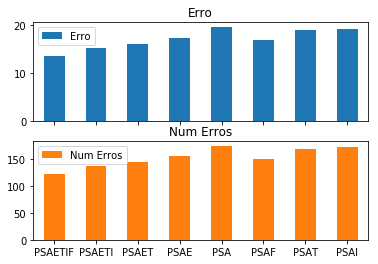

In [89]:
axes = erros.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4ABFB7438>,
      dtype=object)

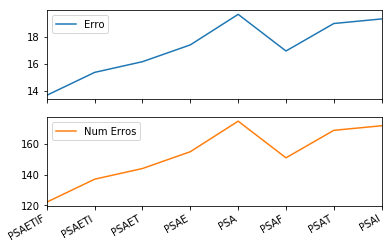

In [90]:
erros.plot.line(subplots=True)

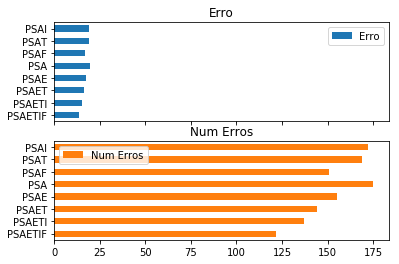

In [91]:
axes = erros.plot.barh(rot=0, subplots=True)
axes[1].legend(loc=2) 

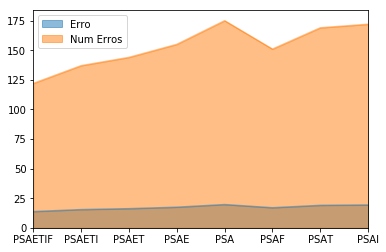

In [92]:
erros.plot.area(stacked=False)